<a href="https://colab.research.google.com/github/NickOLeeney/data-science-projects/blob/main/WineQualityProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
This [dataset](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset) is related to red variants of the Portuguese "Vinho Verde" wine. The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

The goal of this project is to establish wheter a wine is 'good' (i.e. has quality > 5) or 'bad', using a classification ML algorithm.

### Data description
This data frame contains the following columns:

Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
12 - quality (score between 0 and 10)

## Imports

In [81]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

In [82]:
df = pd.read_csv('WineQT.csv')

## EDA

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [84]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [85]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


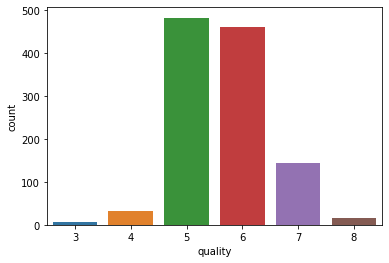

In [86]:
sns.countplot(data=df, x = 'quality')

In [87]:
df['is_good'] = df['quality'].apply(lambda x: 1 if x >5 else 0)

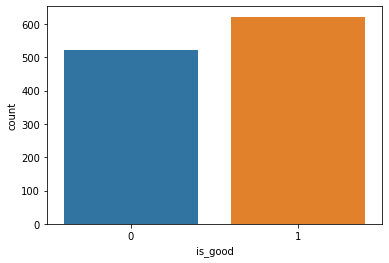

In [88]:
sns.countplot(data=df, x='is_good')

In [89]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,is_good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,0


In [90]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
is_good                 0.846007
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

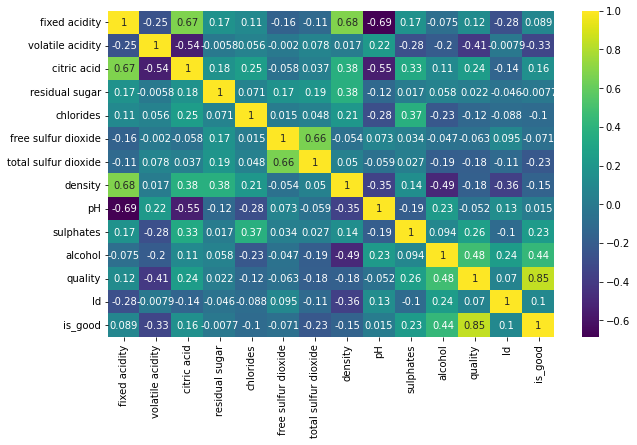

In [91]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap = 'viridis', annot = True)

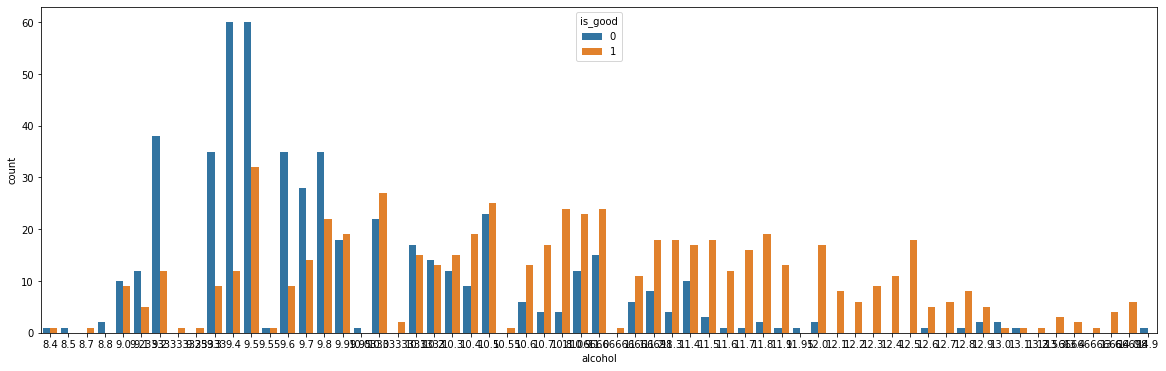

In [92]:
plt.figure(figsize=(20,6))
sns.countplot(data=df, x='alcohol', hue = 'is_good')

Text(0, 0.5, 'fixed acidity')

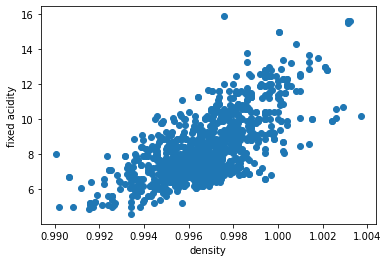

In [93]:
plt.scatter(df['density'], df['fixed acidity'])
plt.xlabel('density')
plt.ylabel('fixed acidity')

Text(0, 0.5, 'fixed acidity')

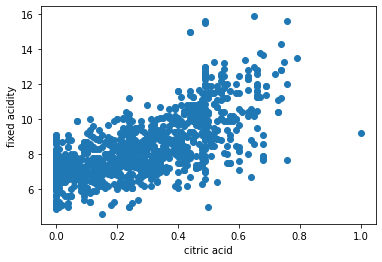

In [94]:
plt.scatter(df['citric acid'], df['fixed acidity'])
plt.xlabel('citric acid')
plt.ylabel('fixed acidity')

Text(0, 0.5, 'free sulfur dioxide')

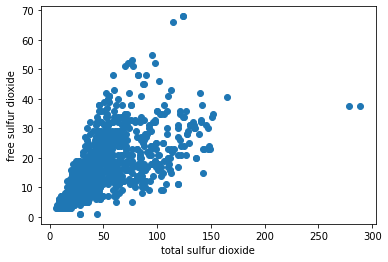

In [95]:
plt.scatter(df['total sulfur dioxide'], df['free sulfur dioxide'])
plt.xlabel('total sulfur dioxide')
plt.ylabel('free sulfur dioxide')

## Model

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
df.drop('Id', axis = 1, inplace=True)
df.drop('quality', axis = 1, inplace=True)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  is_good               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [99]:
X = df.drop('is_good', axis=1)
y = df['is_good']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
scaler = MinMaxScaler()

In [104]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


### Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
model = LogisticRegression()

In [107]:
model.fit(X_train, y_train)

LogisticRegression()

In [108]:
y_pred = model.predict(X_test)

In [109]:
from sklearn.metrics import classification_report, confusion_matrix

In [110]:
print('Logistic Regression Evaluation')
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')

Logistic Regression Evaluation
              precision    recall  f1-score   support

           0       0.50      0.70      0.58       152
           1       0.65      0.45      0.53       191

    accuracy                           0.56       343
   macro avg       0.58      0.57      0.56       343
weighted avg       0.59      0.56      0.56       343



[[106  46]
 [105  86]]




### Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
model = RandomForestClassifier()

In [113]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [114]:
print('Random Forest Evaluation')
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')

Random Forest Evaluation
              precision    recall  f1-score   support

           0       0.45      0.97      0.62       152
           1       0.73      0.06      0.11       191

    accuracy                           0.46       343
   macro avg       0.59      0.52      0.36       343
weighted avg       0.61      0.46      0.33       343



[[148   4]
 [180  11]]


